In [1]:
import surprise

##### 평점 데이터

In [2]:
data = surprise.Dataset.load_builtin('ml-100k')

In [3]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head(10)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
5,298,474,4.0
6,115,265,2.0
7,253,465,5.0
8,305,451,3.0
9,6,86,3.0


In [4]:
df_table = df.set_index(["user", "item"]).unstack()  #unstack : 행열 인덱스가 바뀜

In [5]:
df_table.fillna("").iloc[212:222, 808:817]

rate                                
item  211 212 213 214 215 216 217 218 219
user                                     
290     3                   4       2    
291         4       4   4           4   4
292                 3                    
293     4       3       4   4   3   2    
294                                      
295             5       5   5   4   5    
296     4                                
297     4       3       2   4       3    
298     5       3       5                
299     4   4   5           5

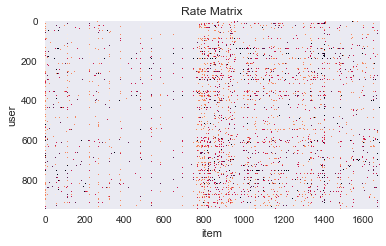

In [6]:
#그림을 그려볼 경우, 빈 데이터가 굉장히 많음을 알 수 있음
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

##### 추천 시스템 알고리즘 사용하기 ( 기본 포멧)

In [8]:
#split, fold 메서드 활용하여 training / test 셋으로 나눔
data.split(n_folds=3)


#모형 알고리즘 객체 생성 (ALS알고리즘 반영한, 베이스라인 모형 알고리즘 객체 생성)

bsl_options = {'method' : 'als',
              'n_epochs' : 5,
              'reg_u' : 12,
              'reg_i' : 5}

algo = surprise.BaselineOnly(bsl_options=bsl_options)

#모형 알고리즘 객체의 train매서드, trainset으로 
np.random.seed(0)
acc = np.zeros(3)
for i, (trainset, testset) in enumerate(data.folds()):
    algo.train(trainset) #모형 알고리즘 객체의 train매서드, trainset으로  모수 추정
    predictions = algo.test(testset) #test 매서드로 test set에 대한 예측 실시
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True) #k-fold 각각의 train/test구분에 대한 예측 성능 계산
acc.mean() #rmse의 평균값 출력

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


Estimating biases using als...
RMSE: 0.9437
Estimating biases using als...
RMSE: 0.9441
Estimating biases using als...
RMSE: 0.9448


0.94416883544920027

In [10]:
#evaluate매서드 활용시 RMSE, MAE를 다 구해줌.
surprise.evaluate(algo,data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9437
MAE:  0.7493
------------
Fold 2
Estimating biases using als...
RMSE: 0.9441
MAE:  0.7501
------------
Fold 3
Estimating biases using als...
RMSE: 0.9448
MAE:  0.7457
------------
------------
Mean RMSE: 0.9442
Mean MAE : 0.7484
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.7493141447992584,
                             0.75014098984779176,
                             0.74566877815933807],
                            'rmse': [0.94365207902773762,
                             0.94405503753844633,
                             0.94479938978141664]})

##### 추천 시스템 알고리즘 사용하기 : Neighborhood 모형 (유사도/가중치예측방법 지정해서, algo / evaluate

In [12]:
#유사도 예측 방법 지정
sim_options = {'name' : 'msd'}
#가중치 예측 방법 지정, 알고리즘에 유사도 예측방법과 함께 반영
algo = surprise.KNNBasic(sim_options=sim_options)
#모델의 예측 성능 계산
surprise.evaluate(algo, data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9908
MAE:  0.7843
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9837
MAE:  0.7788
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9896
MAE:  0.7803
------------
------------
Mean RMSE: 0.9880
Mean MAE : 0.7811
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.78431813559157249,
                             0.77879559456458758,
                             0.78027837892756602],
                            'rmse': [0.99076957150008771,
                             0.98372661533075312,
                             0.9895699202423518]})

In [13]:
#유사도 예측 방법 지정
sim_options = {'name' : 'cosine'}
#가중치 예측 방법 지정, 알고리즘에 유사도 예측방법과 함께 반영
algo = surprise.KNNBasic(sim_options=sim_options)
#모델의 예측 성능 계산
surprise.evaluate(algo, data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0229
MAE:  0.8113
------------
Fold 2
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0158
MAE:  0.8046
------------
Fold 3
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0235
MAE:  0.8087
------------
------------
Mean RMSE: 1.0207
Mean MAE : 0.8082
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.8112832617944169,
                             0.80460180693961514,
                             0.80867364529756269],
                            'rmse': [1.0229447289294977,
                             1.0157510629666604,
                             1.0235279840563991]})

In [16]:
#유사도 예측 방법 지정
sim_options = {'name' : 'pearson'}
#가중치 예측 방법 지정, 알고리즘에 유사도 예측방법과 함께 반영
algo = surprise.KNNBasic(sim_options=sim_options)
#모델의 예측 성능 계산
surprise.evaluate(algo, data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0239
MAE:  0.8137
------------
Fold 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0147
MAE:  0.8064
------------
Fold 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0193
MAE:  0.8078
------------
------------
Mean RMSE: 1.0193
Mean MAE : 0.8093
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.81369892788273845,
                             0.80637215139909135,
                             0.80776023155048104],
                            'rmse': [1.0239388251502424,
                             1.0146963569718288,
                             1.0193107519927347]})

In [17]:
#유사도 예측 방법 지정
sim_options = {'name' : 'pearson_baseline'}
#가중치 예측 방법 지정, 알고리즘에 유사도 예측방법과 함께 반영
algo = surprise.KNNBasic(sim_options=sim_options)
#모델의 예측 성능 계산
surprise.evaluate(algo, data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0114
MAE:  0.8013
------------
Fold 2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0060
MAE:  0.7985
------------
Fold 3
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0089
MAE:  0.7967
------------
------------
Mean RMSE: 1.0088
Mean MAE : 0.7988
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.8012925690354652,
                             0.79848054333093976,
                             0.79671242504606365],
                            'rmse': [1.0113570619885148,
                             1.0059751630919269,
                             1.008926015375619]})

##### 추천 시스템 알고리즘 사용하기 : LatentFactor 모형 (matrix_factorization - SVD)

In [18]:
algo = surprise.SVD(n_factors=200, n_epochs=30)
surprise.evaluate(algo, data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9546
MAE:  0.7520
------------
Fold 2
RMSE: 0.9556
MAE:  0.7557
------------
Fold 3
RMSE: 0.9567
MAE:  0.7523
------------
------------
Mean RMSE: 0.9556
Mean MAE : 0.7533
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.75197211015825682,
                             0.75574322948643868,
                             0.75231879107881605],
                            'rmse': [0.95463089072400342,
                             0.95557215615515789,
                             0.95671631905673427]})